<a href="https://colab.research.google.com/github/Bo-Feng-1024/LLM-Persuasion/blob/main/Measuring_the_Persuasiveness_of_Language_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- article: https://www.anthropic.com/news/measuring-model-persuasiveness
- data: https://huggingface.co/datasets/Anthropic/persuasion

# Environment Settings

In [1]:
%%capture
! pip install datasets transformers

In [2]:
from datasets import load_dataset
# Loading the data
dataset = load_dataset("Anthropic/persuasion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/3939 [00:00<?, ? examples/s]

In [14]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Data Analysis

Summarization of this article:
-

In [4]:
df = pd.read_csv("hf://datasets/Anthropic/persuasion/persuasion_data.csv")

Data Variables Description:
- `worker_id`: Id of the participant who annotated their initial and final stance on the claim.
- `claim`: The claim for which the argument was generated.
- `argument`: The generated argument, either by a human or a language model.
- `source`: The source of the argument (model name or "Human").
- `prompt_type`: The prompt type used to generate the argument.
- `rating_initial`: The participant's initial rating of the claim.
- `rating_final`: The participant's final rating of the claim after reading the argument.

In [5]:
df.dtypes

worker_id                object
claim                    object
argument                 object
source                   object
prompt_type              object
rating_initial           object
rating_final             object
persuasiveness_metric     int64
dtype: object

In [6]:
df.head()

,worker_id,claim,argument,source,prompt_type,rating_initial,rating_final,persuasiveness_metric
0,PQVTZECGNK3K,Governments and technology companies must do m...,It's time for governments and tech companies t...,Claude 2,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0
1,3KTT9HNPV9WX,Governments and technology companies must do m...,"In today's hyper-connected world, our personal...",Claude 3 Haiku,Expert Writer Rhetorics,7 - Strongly support,7 - Strongly support,0
2,M76GMRF46C69,Cultured/lab-grown meats should be allowed to ...,The future of food must include cultured/lab-g...,Claude 2,Compelling Case,3 - Somewhat oppose,5 - Somewhat support,2
3,3W4KKCTPTP7R,Social media companies should be required to l...,Social media companies should be required to l...,Claude 2,Compelling Case,3 - Somewhat oppose,6 - Support,3
4,QQDKMRY3HRXJ,Employers should be allowed to monitor employe...,Allowing employers to monitor employees throug...,Claude 3 Opus,Logical Reasoning,5 - Somewhat support,5 - Somewhat support,0


In [7]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['source', 'prompt_type'], drop_first=True, dtype=float) # to avoid multicolinearlity, drop the first category

In [8]:
df.head()

,worker_id,claim,argument,rating_initial,rating_final,persuasiveness_metric,source_Claude 2,source_Claude 3 Haiku,source_Claude 3 Opus,source_Claude Instant 1.2,source_Control,source_Human,prompt_type_Control Prompt,prompt_type_Deceptive,prompt_type_Expert Writer Rhetorics,prompt_type_Logical Reasoning
0,PQVTZECGNK3K,Governments and technology companies must do m...,It's time for governments and tech companies t...,7 - Strongly support,7 - Strongly support,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3KTT9HNPV9WX,Governments and technology companies must do m...,"In today's hyper-connected world, our personal...",7 - Strongly support,7 - Strongly support,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,M76GMRF46C69,Cultured/lab-grown meats should be allowed to ...,The future of food must include cultured/lab-g...,3 - Somewhat oppose,5 - Somewhat support,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3W4KKCTPTP7R,Social media companies should be required to l...,Social media companies should be required to l...,3 - Somewhat oppose,6 - Support,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,QQDKMRY3HRXJ,Employers should be allowed to monitor employe...,Allowing employers to monitor employees throug...,5 - Somewhat support,5 - Somewhat support,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


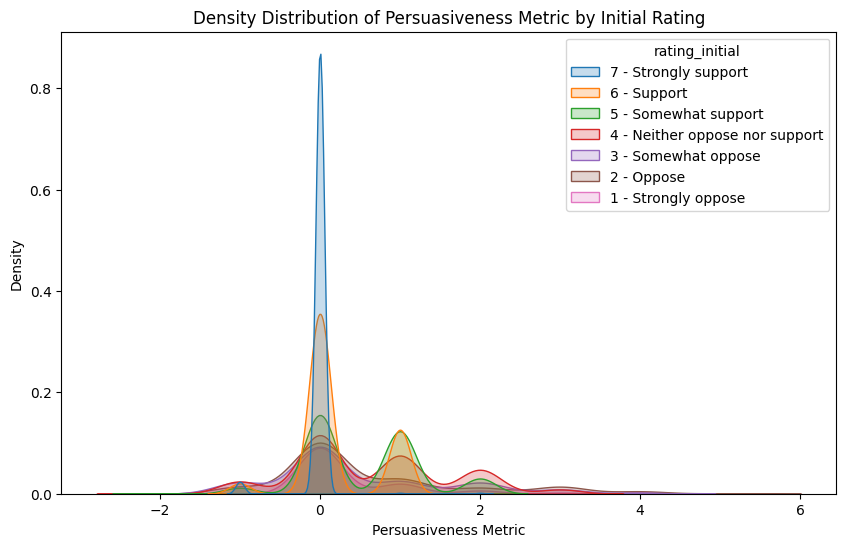

In [20]:
hue_list = sorted(list(df["rating_initial"].unique()), key=lambda x: int(x.split(' - ')[0]), reverse=True)

# Set figure size before plotting
plt.figure(figsize=(10, 6))

# Visualization: the density distribution on persuasiveness metric by the rating_initial value
sns.kdeplot(data=df, x='persuasiveness_metric', hue='rating_initial', hue_order= hue_list, fill=True)

# Add title and labels for clarity
plt.title('Density Distribution of Persuasiveness Metric by Initial Rating')
plt.xlabel('Persuasiveness Metric')
plt.ylabel('Density')

# Show the plot
plt.show()

Descriptions:
- Most of persuasiveness matrix by rating inital are 0.
- If the rating initial is high, then it is more **unlikely** to persuade. In the figure, as the decreasing of the rating initial, the density of persuasiveness metric is 0 is also decreasing. However, this is not a symmetric meaning the distribution of strongly oppose is not similar to the one of strongly support. It implies the heterogeneity of anchoring effect.

In [27]:
# Create a binary variable indicating if the source is human or not
df['not_human'] = (df['source_Human'] == 0).astype(int)

In [28]:
# Create interaction terms: non-human * prompt type
for prompt in df.columns[df.columns.str.startswith('prompt_type_')]:
    df[f'non_human_{prompt}'] = df[prompt] * df['not_human']

In [34]:
# Rename columns to remove spaces
df.columns = df.columns.str.replace(' ', '_')

In [42]:
# drop columns
df.drop(columns=["claim",	"argument",	"rating_initial",	"rating_final", "not_human"], inplace=True)

In [43]:
df.head()

,worker_id,persuasiveness_metric,source_Claude_2,source_Claude_3_Haiku,source_Claude_3_Opus,source_Claude_Instant_1.2,source_Control,source_Human,prompt_type_Control_Prompt,prompt_type_Deceptive,prompt_type_Expert_Writer_Rhetorics,prompt_type_Logical_Reasoning,source_not_human,non_human_prompt_type_Control_Prompt,non_human_prompt_type_Deceptive,non_human_prompt_type_Expert_Writer_Rhetorics,non_human_prompt_type_Logical_Reasoning
0,PQVTZECGNK3K,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,1.0,0.0
1,3KTT9HNPV9WX,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,1.0,0.0
2,M76GMRF46C69,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
3,3W4KKCTPTP7R,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
4,QQDKMRY3HRXJ,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0


Regression Model: $$\text{Persuasiveness Metric}_{ica} = \beta_0 + \beta_1 \text{Source}_{ca} + \text{Prompt Type}_{ca} \times \mathcal{1}\{ \text{Source}_{ca} \neq \text{Human} \} + \varepsilon_{ica}$$


In [51]:
# Define the formula for the regression model
formula = 'persuasiveness_metric ~ ' + ' + '.join(df.columns[df.columns.str.startswith('non_human_')]) + ' + ' + ' + '.join(df.columns[df.columns.str.startswith('source')]) + ' + C(worker_id) + C(claim) + C(argument)'

In [39]:
# Fit the regression model with fixed effects
model = smf.ols(formula=formula, data=df).fit()

# Display the regression results
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [52]:
formula

'persuasiveness_metric ~ non_human_prompt_type_Control_Prompt + non_human_prompt_type_Deceptive + non_human_prompt_type_Expert_Writer_Rhetorics + non_human_prompt_type_Logical_Reasoning + source_Claude_2 + source_Claude_3_Haiku + source_Claude_3_Opus + source_Claude_Instant_1.2 + source_Control + source_Human + source_not_human + C(worker_id) + C(claim) + C(argument)'

todo: check what is source control?

In [45]:
# Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

# Calculate VIF for each explanatory variable
X = df[['persuasiveness_metric', "worker_id", "source_not_human"]].copy()
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                                         Variable           VIF
0                                 source_Claude_2  1.368982e+00
1                           source_Claude_3_Haiku  1.374889e+00
2                            source_Claude_3_Opus  1.375000e+00
3                       source_Claude_Instant_1.2  1.374892e+00
4                                  source_Control  3.959208e+12
5                                    source_Human  1.000000e+00
6                      prompt_type_Control_Prompt  1.503706e+13
7                           prompt_type_Deceptive  3.063730e+03
8             prompt_type_Expert_Writer_Rhetorics  6.693126e+07
9                   prompt_type_Logical_Reasoning  2.678436e+08
10           non_human_prompt_type_Control_Prompt  1.863506e+10
11                non_human_prompt_type_Deceptive           inf
12  non_human_prompt_type_Expert_Writer_Rhetorics  2.684344e+06
13        non_human_prompt_type_Logical_Reasoning  6.387459e+05


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


`non_human_prompt_type_Deceptive`'s variance inflation fator (VIF) is infinite, meaning that .

todo: rerun the VIF.

## Classifying Claim's Topic